In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df_x = pd.read_csv("HousingData.csv", usecols=['RM', "LSTAT"])

In [6]:
df_y = pd.read_csv("HousingData.csv", usecols=['MEDV'])

In [7]:
df_x.describe()

,RM,LSTAT
count,506.000000,486.000000
mean,6.284634,12.715432
std,0.702617,7.155871
min,3.561000,1.730000
25%,5.885500,7.125000
50%,6.208500,11.430000
75%,6.623500,16.955000
max,8.780000,37.970000


In [8]:
reg = linear_model.LinearRegression()

In [21]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.20, random_state=5)

In [16]:
x_mean = df_x["LSTAT"].mean()

In [17]:
df_x.fillna(x_mean, inplace=True)

In [19]:
df_y.isnull().sum()

MEDV    0
dtype: int64

In [22]:
reg.fit(x_train, y_train)

LinearRegression()

In [23]:
print(reg.coef_)

[[ 4.80625396 -0.70140741]]


In [51]:
y_pred = reg.predict(x_test)

In [52]:
print(y_pred)

[[30.9227546 ]
 [29.76801998]
 [25.86150344]
 [ 0.39071739]
 [33.5488095 ]
 [ 8.0060487 ]
 [30.77166088]
 [27.87970554]
 [26.34686712]
 [22.0648174 ]
 [32.50063855]
 [23.13289284]
 [22.90908783]
 [31.11647135]
 [27.20058017]
 [20.65962504]
 [-0.66485824]
 [17.85747707]
 [12.27712728]
 [21.7775462 ]
 [ 4.85965059]
 [24.0249709 ]
 [38.0238396 ]
 [24.60610307]
 [29.75985095]
 [12.64849949]
 [27.0251774 ]
 [21.96389723]
 [27.57147698]
 [28.96878917]
 [11.52183199]
 [10.40749441]
 [18.02557698]
 [24.99024655]
 [26.33458828]
 [23.00427877]
 [26.37801438]
 [12.42951771]
 [37.41677401]
 [33.56951219]
 [20.32395144]
 [ 1.18633076]
 [27.67626345]
 [16.58758988]
 [27.49192748]
 [29.96539903]
 [-3.01941326]
 [17.27301607]
 [20.73321333]
 [13.92698001]
 [20.76425867]
 [21.46461313]
 [25.14070121]
 [16.2314685 ]
 [17.56285193]
 [27.83036932]
 [36.28005256]
 [19.84346182]
 [28.89751054]
 [20.42493377]
 [20.1152955 ]
 [23.04159099]
 [16.50398149]
 [31.34953228]
 [22.59493201]
 [13.04099902]
 [23.43777

In [53]:
print(y_train.max())


MEDV    50.0
dtype: float64


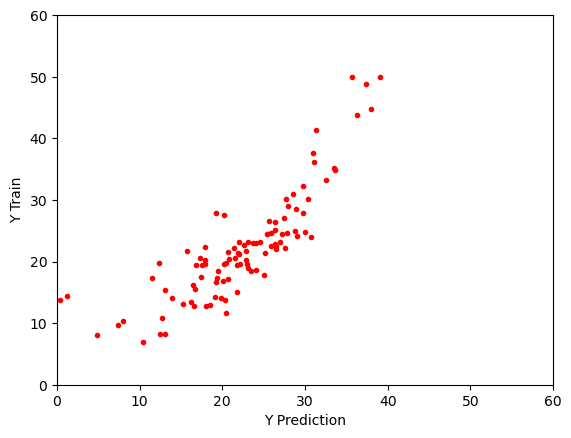

In [75]:
%matplotlib inline
plt.xlabel("Y Prediction")
plt.ylabel("Y Train")
plt.xlim(0, 60)
plt.ylim(0,60)
plt.scatter(y_pred, y_test, color="red", marker=".")

In [39]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_pred)
print(mse)

32.97169907742529


In [40]:
rmse = np.sqrt(mse)
print(rmse)

5.7420988390505165


In [71]:
print(y_pred - y_test)

          MEDV
226  -6.677245
292   1.868020
90    3.261503
373 -13.409283
273  -1.651191
..         ...
349  -0.968931
212  -4.534473
156   2.117026
480   0.666693
248   0.940404

[102 rows x 1 columns]
